In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys

sys.path.append("../..")

import pandas as pd
import niimpy
import numpy as np

from omegaconf import DictConfig, OmegaConf
import hydra

ALPHA = 0.2
apath ="/m/cs/scratch/networks-nima-mmm2018/data/mmm2018/mmm-bd/AwareAccelerometer.sqlite3"
bpath ="/m/cs/scratch/networks-nima-mmm2018/data/mmm2018/mmm-bd/ActiwatchFull.sqlite3"

adf = niimpy.read_sqlite(apath, table="awareaccelerometer", tz="Europe/Helsinki")
bdf = niimpy.read_sqlite(bpath, table="ActiwatchFull", tz="Europe/Helsinki")

In [50]:

# Compute magnitude
def mag(x, y, z):
    return np.sqrt(x**2 + y**2 + z**2)

adf = adf.rename(
            columns={
                "double_values_0": "x",
                "double_values_1": "y",
                "double_values_2": "z",
            }
        )

# Transform to magnitude
adf["mag"] = np.sqrt(adf["x"] ** 2 + adf["y"] ** 2 + adf["z"] ** 2)
# Normalize magnitude by subtracting the mean for each user
groupby_cols = ["user", "device"]
adf["mag_norm"] = adf.groupby(groupby_cols)["mag"].transform(
            lambda x: x - x.mean()
)

/tmp/ipykernel_30118/2707098231.py:4: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  sample = sample[(sample.index.date >= pd.to_datetime("2019-01-26 12:00:00")) & (sample.index.date <= pd.to_datetime("2019-01-27 12:00:00"))].copy(deep=True)


<AxesSubplot:title={'center':'Magnitude'}, ylabel='mag_norm'>

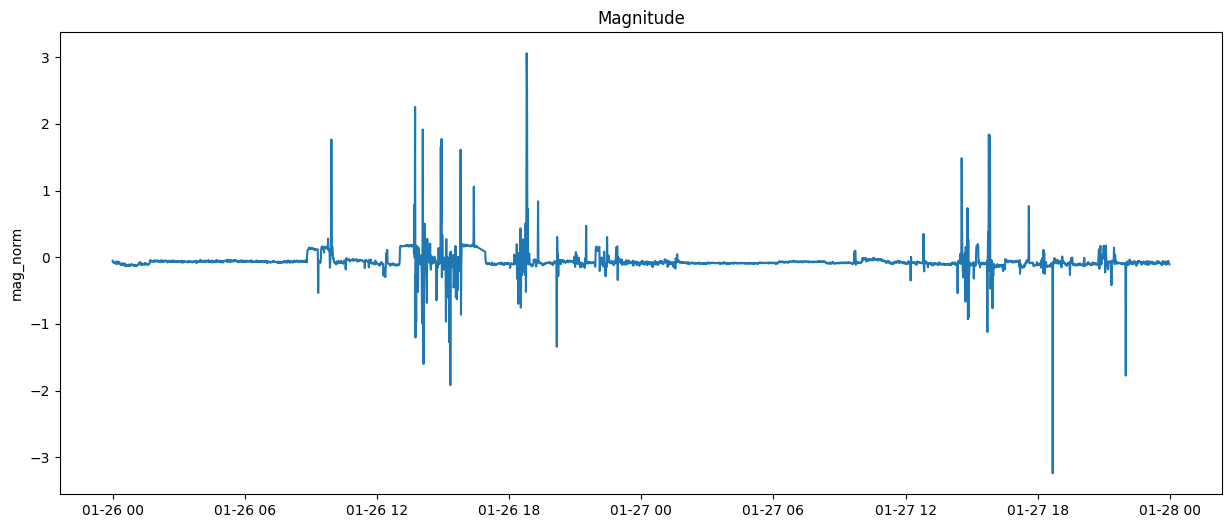

In [64]:
fig = plt.figure(figsize=(15, 6))

sample = adf[adf.user==adf.user.unique()[0]].resample('1T').agg('mean')
sample = sample[(sample.index.date >= pd.to_datetime("2019-01-26 12:00:00")) & (sample.index.date <= pd.to_datetime("2019-01-27 12:00:00"))].copy(deep=True)

plt.title("Magnitude")
# sns.lineplot(sample['mag_norm'], label='mag raw')
sns.lineplot(sample["mag_norm"])

In [65]:
adf

,user,device,time,x,y,z,datetime,mag,mag_norm
2019-01-25 11:16:40.231000064+02:00,7ov4Ahb_Kg1n,9vkulG-m4mXQ,1.548408e+09,-0.181959,7.299921,6.284780,2019-01-25 11:16:40.231000064+02:00,9.634335,-0.208557
2019-01-25 11:17:10.244000+02:00,7ov4Ahb_Kg1n,9vkulG-m4mXQ,1.548408e+09,-0.799663,6.426037,7.144298,2019-01-25 11:17:10.244000+02:00,9.642324,-0.200568
2019-01-25 11:17:40.244999936+02:00,7ov4Ahb_Kg1n,9vkulG-m4mXQ,1.548408e+09,-1.019930,-8.911219,3.138798,2019-01-25 11:17:40.244999936+02:00,9.502743,-0.340149
2019-01-25 11:18:10.246000128+02:00,7ov4Ahb_Kg1n,9vkulG-m4mXQ,1.548408e+09,-2.758120,-8.358158,4.185065,2019-01-25 11:18:10.246000128+02:00,9.745809,-0.097082
2019-01-25 11:18:40.268999936+02:00,7ov4Ahb_Kg1n,9vkulG-m4mXQ,1.548408e+09,-2.877831,-8.298303,4.201824,2019-01-25 11:18:40.268999936+02:00,9.736481,-0.106411
...,...,...,...,...,...,...,...,...,...
2021-12-12 19:19:55.428000+02:00,5U61OcE1cgW_,v5pEhqeTme6s,1.639330e+09,-0.778116,0.711078,9.646238,2021-12-12 19:19:55.428000+02:00,9.703660,-0.056322
2021-12-12 19:20:25.562000128+02:00,5U61OcE1cgW_,v5pEhqeTme6s,1.639330e+09,-3.385401,7.843405,-3.749320,2021-12-12 19:20:25.562000128+02:00,9.329380,-0.430602
2021-12-12 19:20:55.712999936+02:00,5U61OcE1cgW_,v5pEhqeTme6s,1.639330e+09,-6.054936,7.716512,-0.026336,2021-12-12 19:20:55.712999936+02:00,9.808542,0.048560
2021-12-12 19:21:25.720000+02:00,5U61OcE1cgW_,v5pEhqeTme6s,1.639330e+09,-4.704607,8.286332,-2.703054,2021-12-12 19:21:25.720000+02:00,9.904702,0.144720
